https://en.wikipedia.org/wiki/MACD  
https://www.investopedia.com/terms/m/macd.asp  
 
The MACD indicator (or "oscillator") is a collection of three time series calculated from historical price data, most often the closing price.

These three series are: the MACD series proper, the "signal" or "average" series, and the "divergence" series which is the difference between the two.

1. MACD series proper  
2. signal or average  
3. divergence series, the difference between 1 and 2.  

## Calculation

1.  
The MACD series is the difference between a "fast" (short period) exponential moving average (EMA), and a "slow" (longer period) EMA of the price series. 

2.  
The average series is an EMA of the MACD series itself.

3.  
Subtract 2. from 1, the histogram.  


## Usage


### Cross-over

MACD crosses Signal (series 1 crosses series 2) signals bullish or bearish.  
MACD cross Signal downward  ~ Bearish  
MACD cross Signal upward ~ Bullish

### Divergence

w.r.t. long term trend, signal trend change.  


### Example

MACD paper example (Aj.Kanix's paper)  

System-1: Main Trend  
"Once the signal crosses above the zero line, it signals a buy. Once the signal crosses below the zero line, it signals a sell." (Bukkavesa & Sakunasingha)

System-2: Main Trend + Fund Flows  
"compare the 20-day simple moving average of the volume with the 60-day simple moving average of the volume of our interested stock. If the 20-day volume is greater than the 60-day, while our main system signals the buy, then this system will signal a buy." (Bukkavesa & Sakunasingha)

System-3: Main Trend + RSI of Market  
"calculating the rate of change for the stock and the SET market for the past 10 days, then compare it with each other.  This study called for Relative Strength Comparison (RSC) to the SET market.  If RSC is positive, it means that the stock has relative strength better than the market’s. If RSC is negative, it means that the stock has relative strength worse than that of the market.  For the third strategy, if our main system signals a buy while the RSC is positive, then this third strategy will signal a buy. To signal a buy, both the condition must be present at the same time." (Bukkavesa & Sakunasingha)

System-4: Main Trend + FF + RSC  (Main Trend + Two Conditions)  
"to signal a buy, the main system and the other two conditions, fund flows and RSC must also be presented at the same time. 
For sell and exit strategy, this research only deployed the sell signal for stocks in all strategies once the MACD signal crosses below the zero line." (Bukkavesa & Sakunasingha)

In [1]:
import sys, os, os.path
import pandas as pd
import numpy as np
import talib
from talib.abstract import *

import matplotlib.pyplot as plt
%matplotlib inline


if not 'EXPERIMENT_HOME' in os.environ: # Configure local paths if not already defined
    ML_HOME = os.path.abspath(os.path.join("..", "..","ml_home")) # ML workspace
    EXPERIMENT_HOME = os.path.abspath(os.path.join(ML_HOME, "..")) # Experiment workspace
    DATA_HOME = os.path.abspath(os.path.join(EXPERIMENT_HOME,"dataset","historical")) # Dataset location
    os.environ["EXPERIMENT_HOME"] = EXPERIMENT_HOME
    os.environ["DATA_HOME"] = DATA_HOME
    sys.path.insert(0, EXPERIMENT_HOME)
    sys.path.insert(0, ML_HOME) # Add to path so can load our library
    os.chdir(EXPERIMENT_HOME) # Change working directory to experiment workspace
print("Experiment Home: ", os.path.abspath(os.curdir), "; Data Home:", DATA_HOME)

Experiment Home:  /home/jovyan ; Data Home: /home/jovyan/dataset/historical


/home/jovyan/ml_home/data/src.py:75: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  df = pd.concat(rows, ignore_index=True)


,Adj Close,Close,DailyPriceVariation,DailyReturn,Date,High,Industry,Low,Open,PriceStDev-5d,Sector,Ticker,Volume
0,105.627823,140.5,0.032028,0.024606,2014-01-08,144.5,Banking,140.0,143.5,5.438290,Financials,SCB,10750100.0
1,106.755524,142.0,0.017606,-0.010620,2014-01-09,142.5,Banking,140.0,140.5,4.367494,Financials,SCB,10457800.0
2,106.379631,141.5,0.031802,0.003527,2014-01-10,143.5,Banking,139.0,141.0,1.557241,Financials,SCB,8957400.0
3,110.514511,147.0,0.051020,-0.038133,2014-01-13,147.0,Banking,139.5,139.5,2.573908,Financials,SCB,8347900.0
4,111.642220,148.5,0.026936,-0.010152,2014-01-14,148.5,Banking,144.5,146.0,3.595136,Financials,SCB,7634400.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
718,198.834595,231.0,0.021645,0.012903,2014-12-24,235.0,Banking,230.0,234.0,1.140175,Financials,KBANK,3903800.0
719,197.113113,229.0,0.008734,0.008696,2014-12-25,230.0,Banking,228.0,230.0,1.923538,Financials,KBANK,1657800.0
720,197.973877,230.0,0.021739,-0.004357,2014-12-26,232.0,Banking,227.0,229.0,2.073644,Financials,KBANK,2585600.0
721,197.113113,229.0,0.021834,0.004357,2014-12-29,233.0,Banking,228.0,231.0,2.073644,Financials,KBANK,3758200.0


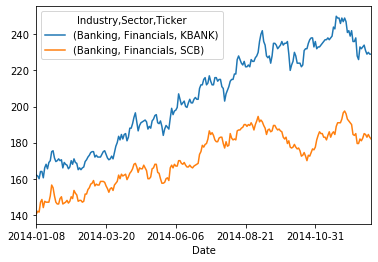

In [2]:
from dataset import pilot10stock, sectors, industries
from dataset import years
from dataset import Yr2014, Yr2015, Yr2016
from data.src import stockdata_fetch_local

df = stockdata_fetch_local(Yr2014.dt_start, Yr2014.dt_end, ["SCB","KBANK"])
tbl = df.pivot_table(values='Close', index='Date', columns=['Industry', 'Sector', 'Ticker'])
tbl.plot()
df

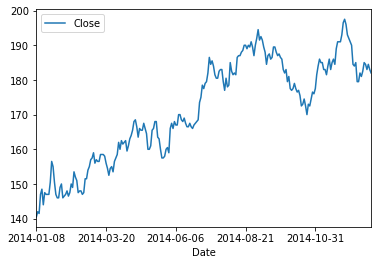

In [3]:
series1 = df[df['Ticker']=='SCB']
series2 = df[df['Ticker']=='KBANK']

# Set date column as index of the time-series
series1 = series1.set_index(series1.Date)
series2 = series2.set_index(series2.Date)

series1[['Close']].plot()

# Calculate MACD with TA-Lib library

```
macd, macdsignal, macdhist = MACD(close, fastperiod=12, slowperiod=26, signalperiod=9)
```

[Documentation](https://mrjbq7.github.io/ta-lib/func_groups/momentum_indicators.html)  
[Example](https://github.com/mellertson/talib-macd-example/blob/master/talib-macd-matplotlib-example.py)

In [4]:
from talib.abstract import *

daily = series1 

inputs = {
    'open': daily["Open"],
    'high': daily["High"],
    'low': daily["Low"],
    'close': daily["Close"],
    'volume': daily["Volume"]
}


daily_sma = SMA(inputs, timeperiod=25)
macd, macdsignal, macdhist = MACD(inputs) # Default MACD(12, 26, 9)

daily["SMA"] = daily_sma.tolist()
daily["MACD"] = macd.tolist()
daily["MACD_signal"] = macdsignal.tolist()
daily["MACD_histogram"] = macdhist.tolist()
daily.tail()

,Adj Close,Close,DailyPriceVariation,DailyReturn,Date,High,Industry,Low,Open,PriceStDev-5d,Sector,Ticker,Volume,SMA,MACD,MACD_signal,MACD_histogram
Date,,,,,,,,,,,,,,,,,
2014-12-24,143.104462,184.5,0.010840,0.002706,2014-12-24,186.0,Banking,184.0,185.0,1.695582,Financials,SCB,1868200.0,187.76,-0.886454,-0.139721,-0.746733
2014-12-25,141.940994,183.0,0.013661,0.008163,2014-12-25,184.0,Banking,181.5,182.5,1.604681,Financials,SCB,2521600.0,187.68,-0.939829,-0.299743,-0.640086
2014-12-26,143.104462,184.5,0.018970,-0.008163,2014-12-26,184.5,Banking,181.0,182.0,1.083974,Financials,SCB,2458300.0,187.62,-0.851278,-0.410050,-0.441229
2014-12-29,141.940994,183.0,0.013661,0.008163,2014-12-29,185.5,Banking,183.0,185.0,0.935414,Financials,SCB,2633100.0,187.56,-0.891858,-0.506411,-0.385447
2014-12-30,141.165359,182.0,0.016484,0.005479,2014-12-30,185.0,Banking,182.0,185.0,1.083974,Financials,SCB,2993400.0,187.28,-0.993260,-0.603781,-0.389479


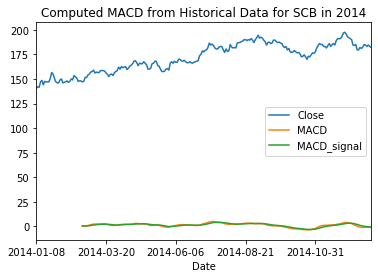

In [5]:
daily[['Close', 'MACD', 'MACD_signal']].plot(title="Computed MACD from Historical Data for SCB in 2014")

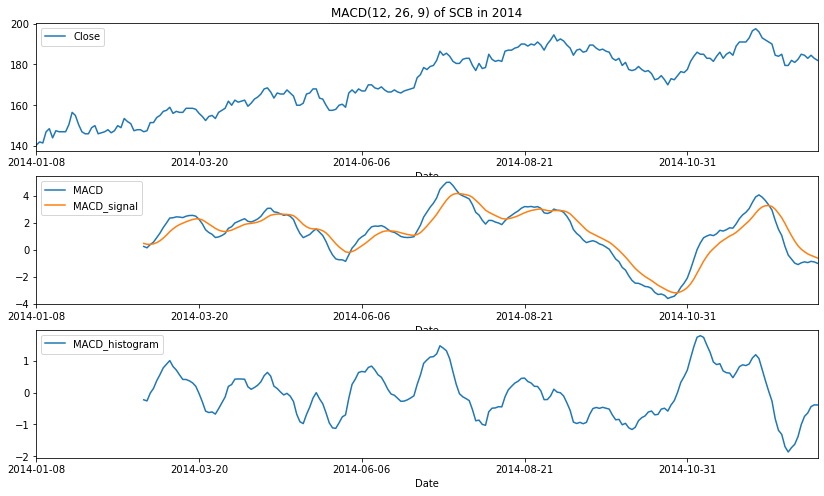

In [6]:
title = "MACD(12, 26, 9) of SCB in 2014"
plt.figure(1)
plt.subplot(3,1,1)
daily[['Close']].plot(ax=plt.gca(), title=title, figsize=(14,8)) #no need to specify for first axis
plt.subplot(3,1,2)
daily[['MACD', 'MACD_signal']].plot(ax=plt.gca(), title="")
plt.subplot(3,1,3)
daily[['MACD_histogram']].plot(ax=plt.gca(), title="")

## Some Scatter Plot

Text(0.5, 1.0, 'No correlation between Volatility and MACD Histogram')

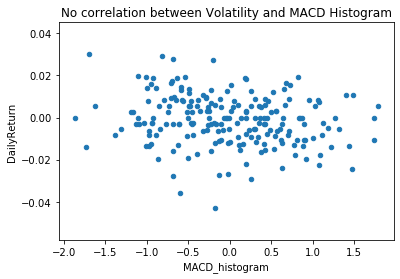

In [7]:
ax = daily[['DailyReturn', 'MACD_histogram']].plot.scatter(x='MACD_histogram', y='DailyReturn')
ax.set_title("No correlation between Volatility and MACD Histogram")

Text(0.5, 1.0, 'No correlation between Volatility and MACD Histogram')

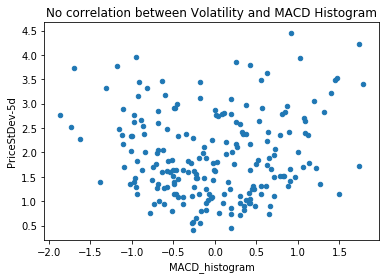

In [8]:
ax = daily[['PriceStDev-5d', 'MACD_histogram']].plot.scatter(x='MACD_histogram', y='PriceStDev-5d')
ax.set_title("No correlation between Volatility and MACD Histogram")

# Zoom In

Plot periods: [(0, 50), (50, 100), (100, 150), (150, 200), (200, 250)]


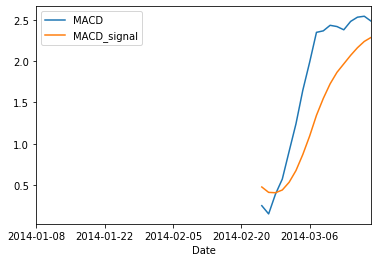

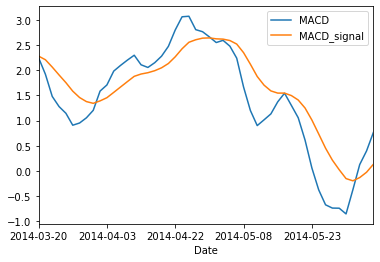

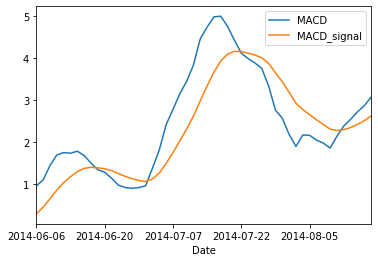

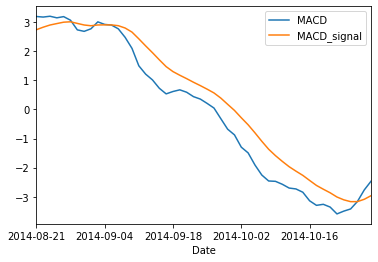

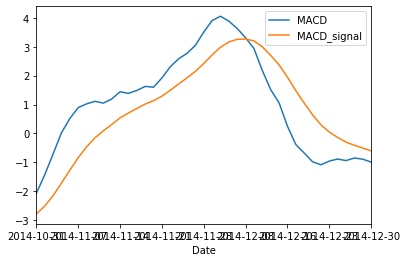

In [9]:
# periods = [(0, 50), (20, 70), (50, 100), (70, 120)]
periods = [(k,k+50) for k in range(0, len(daily), 50)]
print("Plot periods:", periods)


for i,j in periods:
    daily[i:j][['MACD', 'MACD_signal']].plot()

# Crossover

In [14]:

def crossover_ndays(x, n=2):
    """Whether MACD signal (MACD and signal lines) crossover occur. """
    mean = x.mean() # Mean of the window.

daily.dropna(inplace=True)
macd_cross = daily[['Close','DailyReturn','Date','MACD', 'MACD_signal', 'MACD_histogram']]
macd_cross

# MACD cross Signal downward  means bearish.


,Close,DailyReturn,Date,MACD,MACD_signal,MACD_histogram
Date,,,,,,
2014-02-25,147.0,0.006780,2014-02-25,0.248510,0.475059,-0.226548
2014-02-26,147.5,-0.003396,2014-02-26,0.148809,0.409809,-0.261000
2014-02-27,151.5,-0.026757,2014-02-27,0.388087,0.405464,-0.017377
2014-02-28,151.5,0.000000,2014-02-28,0.571134,0.438598,0.132535
2014-03-03,154.0,-0.016367,2014-03-03,0.907467,0.532372,0.375096
...,...,...,...,...,...,...
2014-12-24,184.5,0.002706,2014-12-24,-0.886454,-0.139721,-0.746733
2014-12-25,183.0,0.008163,2014-12-25,-0.939829,-0.299743,-0.640086
2014-12-26,184.5,-0.008163,2014-12-26,-0.851278,-0.410050,-0.441229


In [15]:
# Get previous values of MACD and Signal series

macd_cross["MACD_ytd"] = macd_cross[['MACD']].shift(1) # Yesterday's MACD
macd_cross["MACD_signal_ytd"] = macd_cross[['MACD_signal']].shift(1) # Yesterday's Signal
macd_cross.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Close,DailyReturn,Date,MACD,MACD_signal,MACD_histogram,MACD_ytd,MACD_signal_ytd
Date,,,,,,,,
2014-02-25,147.0,0.006780,2014-02-25,0.248510,0.475059,-0.226548,NaN,NaN
2014-02-26,147.5,-0.003396,2014-02-26,0.148809,0.409809,-0.261000,0.248510,0.475059
2014-02-27,151.5,-0.026757,2014-02-27,0.388087,0.405464,-0.017377,0.148809,0.409809
2014-02-28,151.5,0.000000,2014-02-28,0.571134,0.438598,0.132535,0.388087,0.405464
2014-03-03,154.0,-0.016367,2014-03-03,0.907467,0.532372,0.375096,0.571134,0.438598


In [16]:
# MACD yesterday is lower than MACD today

# macd_cross["MACD_ytd"] < macd_cross["MACD"]

# Cross upward signal:  MACD cross Signal in upward direction. 
# Condition: MACD value was lower than Signal yesterday, but today MACD value is higher than Signal.

# upward trend -> bullish

situation_ytd = macd_cross["MACD_ytd"] < macd_cross["MACD_signal_ytd"]
situation_today = macd_cross["MACD"] > macd_cross["MACD_signal"]
uptrend = situation_ytd & situation_today
uptrend

macd_cross['Up'] = uptrend[uptrend==True].astype(int)

# Cross downward signal:  MACD cross Signal in downward direction. 
# Condition: MACD value was higher than Signal yesterday, but today MACD value is lower than Signal.

# downward trend -> bearish

situation_ytd = macd_cross["MACD_ytd"] > macd_cross["MACD_signal_ytd"]
situation_today = macd_cross["MACD"] < macd_cross["MACD_signal"]
downtrend = situation_ytd & situation_today
downtrend

macd_cross['Down'] = downtrend[downtrend==True].astype(int)


macd_cross




/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Close,DailyReturn,Date,MACD,MACD_signal,MACD_histogram,MACD_ytd,MACD_signal_ytd,Up,Down
Date,,,,,,,,,,
2014-02-25,147.0,0.006780,2014-02-25,0.248510,0.475059,-0.226548,NaN,NaN,NaN,NaN
2014-02-26,147.5,-0.003396,2014-02-26,0.148809,0.409809,-0.261000,0.248510,0.475059,NaN,NaN
2014-02-27,151.5,-0.026757,2014-02-27,0.388087,0.405464,-0.017377,0.148809,0.409809,NaN,NaN
2014-02-28,151.5,0.000000,2014-02-28,0.571134,0.438598,0.132535,0.388087,0.405464,1.0,NaN
2014-03-03,154.0,-0.016367,2014-03-03,0.907467,0.532372,0.375096,0.571134,0.438598,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2014-12-24,184.5,0.002706,2014-12-24,-0.886454,-0.139721,-0.746733,-0.958161,0.046962,NaN,NaN
2014-12-25,183.0,0.008163,2014-12-25,-0.939829,-0.299743,-0.640086,-0.886454,-0.139721,NaN,NaN
2014-12-26,184.5,-0.008163,2014-12-26,-0.851278,-0.410050,-0.441229,-0.939829,-0.299743,NaN,NaN


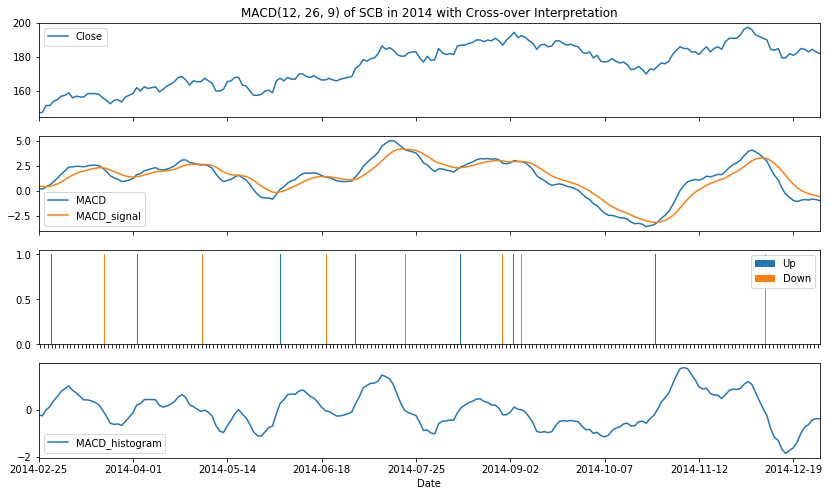

In [25]:
title = "MACD(12, 26, 9) of SCB in 2014 with Cross-over Interpretation"
plt.figure(2)
plt.subplot(4,1,1)
macd_cross[['Close']].plot(ax=plt.gca(), title=title, figsize=(14,8)) #no need to specify for first axis
plt.subplot(4,1,2)
macd_cross[['MACD', 'MACD_signal']].plot(ax=plt.gca(), title="", sharex=True)
plt.subplot(4,1,3)
macd_cross[['Up', 'Down']].plot(kind='bar',ax=plt.gca(), title="", sharex=True)
plt.subplot(4,1,4)
macd_cross[['MACD_histogram']].plot(ax=plt.gca(), title="", sharex=True)


# Notes



# References

[1]  En.wikipedia.org. 2020. MACD. [online] Available at: <https://en.wikipedia.org/wiki/MACD> [Accessed 15 December 2020].

[2]  FERNANDO, J., 2020. Moving Average Convergence Divergence (MACD) Definition. [online] Investopedia. Available at: <https://www.investopedia.com/terms/m/macd.asp> [Accessed 15 December 2020].

[3]  